Nama: Syalista Galuh Nadira

NIM: 2702346361

# Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('AP004.csv', parse_dates=['From Date', 'To Date']) # parse kolom From Date & To Date sebagai objek datetime

df.head()

,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),...,Temp (degree C),RH (%),WS (m/s),WD (degree),SR (W/mt2),BP (mmHg),VWS (m/s),AT (degree C),RF (mm),Xylene (ug/m3)
0,2017-09-05 14:00:00,2017-09-05 15:00:00,25.00,45.00,1.80,12.20,7.90,10.20,5.60,0.35,...,30.30,69.00,3.20,213.00,372.00,747.00,0.10,33.80,0.00,0.50
1,2017-09-05 15:00:00,2017-09-05 16:00:00,23.00,49.50,0.65,14.55,8.28,8.85,4.52,0.41,...,30.00,70.50,4.10,140.00,290.75,747.25,0.05,32.22,0.00,0.48
2,2017-09-05 16:00:00,2017-09-05 17:00:00,18.00,55.75,4.00,26.58,17.40,6.23,5.35,0.38,...,29.85,88.00,2.82,174.75,300.25,747.00,0.00,28.30,0.93,0.53
3,2017-09-05 17:00:00,2017-09-05 18:00:00,19.75,33.50,1.63,21.78,12.92,8.30,5.30,0.48,...,29.25,88.75,1.72,231.50,225.50,747.75,0.00,28.77,0.00,1.85
4,2017-09-05 18:00:00,2017-09-05 19:00:00,14.00,28.00,1.07,26.38,14.90,3.42,4.68,0.43,...,28.05,88.50,1.97,105.25,11.25,748.25,0.00,28.25,0.00,2.17


In [ ]:
df.tail()

,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),...,Temp (degree C),RH (%),WS (m/s),WD (degree),SR (W/mt2),BP (mmHg),VWS (m/s),AT (degree C),RF (mm),Xylene (ug/m3)
48797,2023-03-31 19:00:00,2023-03-31 20:00:00,10.75,29.25,2.98,8.18,6.77,6.10,8.90,0.50,...,NaN,67.00,4.97,186.25,3.0,751.75,0.06,33.58,0.0,0.53
48798,2023-03-31 20:00:00,2023-03-31 21:00:00,9.75,28.75,3.15,9.88,7.77,6.10,10.43,0.68,...,NaN,70.75,3.70,162.75,3.0,752.00,0.07,32.52,0.0,0.50
48799,2023-03-31 21:00:00,2023-03-31 22:00:00,16.75,33.75,2.95,14.32,10.00,7.90,12.17,0.86,...,NaN,73.25,3.33,128.75,3.0,752.50,0.07,31.20,0.0,0.75
48800,2023-03-31 22:00:00,2023-03-31 23:00:00,12.75,34.75,1.98,13.60,8.80,10.12,18.57,0.76,...,NaN,75.00,3.55,120.25,3.5,753.00,0.06,30.85,0.0,0.70
48801,2023-03-31 23:00:00,2023-04-01 00:00:00,12.00,40.00,1.87,12.73,8.30,9.50,17.17,0.37,...,NaN,75.00,3.03,123.00,3.0,753.00,0.05,30.80,0.0,0.43


In [ ]:
df.shape # untuk tau jumlah baris dan kolom df (baris, kolom)

(48802, 25)

In [ ]:
df.columns # untuk tau kolom apa saja yang tersedia

Index(['From Date', 'To Date', 'PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)',
       'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)',
       'Ozone (ug/m3)', 'Benzene (ug/m3)', 'Toluene (ug/m3)',
       'Eth-Benzene (ug/m3)', 'MP-Xylene (ug/m3)', 'Temp (degree C)', 'RH (%)',
       'WS (m/s)', 'WD (degree)', 'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)',
       'AT (degree C)', 'RF (mm)', 'Xylene (ug/m3)'],
      dtype='object')

Kolom To Date akan saya drop karena nilainya selalu sama dengan From Date di baris berikutnya, sehingga redundant dan tidak informatif sebagai fitur.

In [ ]:
df = df.drop(columns=['To Date'])

### **List variabel**
* From Date: Starting date of data collection (YYYY-MM-DD HH:MM:SS)
* PM10: Particulate Matter 10 (ug/m3)
* PM2.5: Particulate Matter 2.5 (ug/m3)
* CO: Carbon Monoxide (mg/Nm3, mg/m3, ng/m3, ug/m3)
* CO2: Carbon Dioxide (mg/m3)
* NO: Nitric Oxide (mg/m3, ppb, ppm, ug/m3)
* NO2: Nitrogen Dioxide (ug/m3)
* NOx: Nitrogen Oxides (ppb, ppm, ug/m3)
* NH3: Ammonia (ppb, ug/m3)
* SO2: Sulfur Dioxide (ug/m3)
* Temp: Temperature (degrees Celsius or ug/m3)
* AT: Air Temperature (degrees Celsius or ug/m3)
* BP: Barometric Pressure (W/m2, mg/m3, mmHg)
* Benzene: Concentration of Benzene in the air (mg/m3 or ug/m3)
* Toluene: Concentration of Toluene in the air (ug/m3)
* VWS: Wind Speed (degree, m/s)
* Variance: Variance (n)
* WD: Wind Direction (deg, degree C, degree)
* WS: Wind Speed (m/s, ug/m3)
* xylene: Concentration of Xylene in the air (ug/m3)
* CH4: Methane (ug/m3)
* Eth-Benzene: Concentration of Ethylbenzene in the air (ug/m3)
* Gust: Wind Gust (kl/h, km/hr, m/s)
* HCHO: Formaldehyde (ug/m3)
* Hg: Mercury (ug/m3)
* MH: Mixing Height (meters (m))
* MP-Xylene: Concentration of Meta-Para Xylene in the air (ug/m3)
* NMHC: Non-Methane Hydrocarbons (ug/m3)
* O Xylene: Concentration of Ortho-Xylene in the air (ug/m3)
* Ozone: Ozone Concentration (ppb, ug/m3)
* Power: Power Consumption (Watts (W))
* RF: Rainfall (m/s, mm)
* RH: Relative Humidity (%, W/m2, degree)
* SPM: Suspended Particulate Matter (ug/m3)
* SR: Solar Radiation (W/m2, ug/m3)
* THC: Total Hydrocarbons (ug/m3)

In [ ]:
# Descriptive statistics untuk mengenali pola data, potensi outlier, dan menentukan metode preprocessing yang sesuai
df.describe()

,From Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),...,Temp (degree C),RH (%),WS (m/s),WD (degree),SR (W/mt2),BP (mmHg),VWS (m/s),AT (degree C),RF (mm),Xylene (ug/m3)
count,48802,46344.000000,46917.000000,47244.000000,47224.000000,46628.000000,47140.000000,46649.000000,46387.000000,47156.000000,...,21599.000000,47364.000000,47375.000000,47373.000000,47146.000000,47373.000000,47176.000000,47286.000000,47510.000000,47075.000000
mean,2020-06-18 06:30:00,34.821967,71.598595,2.509505,15.284711,10.025558,13.382927,8.498869,0.693976,40.931671,...,28.862483,69.547402,2.758707,184.428806,193.844929,752.029991,0.006144,28.083312,0.037863,0.733060
min,2017-09-05 14:00:00,0.250000,0.250000,0.030000,0.100000,0.000000,0.100000,0.100000,0.000000,0.200000,...,7.700000,15.000000,0.200000,45.330000,0.000000,736.500000,-0.280000,4.500000,0.000000,0.000000
25%,2019-01-26 22:15:00,12.000000,34.500000,1.450000,8.450000,6.000000,8.200000,4.920000,0.430000,14.730000,...,27.950000,59.250000,1.620000,123.750000,3.500000,748.000000,-0.020000,25.170000,0.000000,0.100000
50%,2020-06-18 06:30:00,25.000000,59.750000,1.900000,12.800000,8.470000,11.900000,7.250000,0.630000,33.230000,...,28.750000,72.750000,2.550000,187.750000,111.750000,752.500000,0.000000,28.270000,0.000000,0.330000
75%,2021-11-08 14:45:00,51.250000,100.500000,2.600000,19.300000,12.150000,17.000000,10.370000,0.880000,59.680000,...,29.820000,81.250000,3.670000,240.500000,402.250000,756.000000,0.040000,31.050000,0.000000,0.800000
max,2023-03-31 23:00:00,723.000000,835.500000,216.170000,166.250000,166.000000,118.250000,183.300000,18.690000,198.400000,...,54.700000,100.000000,45.900000,326.000000,455.750000,808.250000,15.000000,45.850000,42.200000,64.020000
std,NaN,30.785200,48.312579,5.058787,10.415231,7.179902,7.847778,6.086666,0.437964,32.651348,...,1.844666,14.900450,1.441744,65.375666,191.882654,5.047151,0.092525,4.458718,0.444720,1.302384


In [ ]:
# Cek persentase missing value di tiap kolom untuk tau jika perlu handle missing value
missing_percent = df.isnull().mean() * 100
print(missing_percent.sort_values(ascending=False).round(2))

Temp (degree C)        55.74
Eth-Benzene (ug/m3)    50.85
MP-Xylene (ug/m3)      19.56
PM2.5 (ug/m3)           5.04
CO (mg/m3)              4.95
NOx (ppb)               4.45
SO2 (ug/m3)             4.41
Toluene (ug/m3)         3.88
Benzene (ug/m3)         3.87
PM10 (ug/m3)            3.86
Xylene (ug/m3)          3.54
NH3 (ug/m3)             3.41
SR (W/mt2)              3.39
Ozone (ug/m3)           3.37
VWS (m/s)               3.33
NO2 (ug/m3)             3.23
NO (ug/m3)              3.19
AT (degree C)           3.11
RH (%)                  2.95
WD (degree)             2.93
BP (mmHg)               2.93
WS (m/s)                2.92
RF (mm)                 2.65
From Date               0.00
dtype: float64


In [ ]:
# Jumlah baris yang value di kolom AT (degree C) = NaN
# Jika ada, harus didrop nanti karena tidak bisa digunakan untuk train model
print(df['AT (degree C)'].isnull().sum())

1516


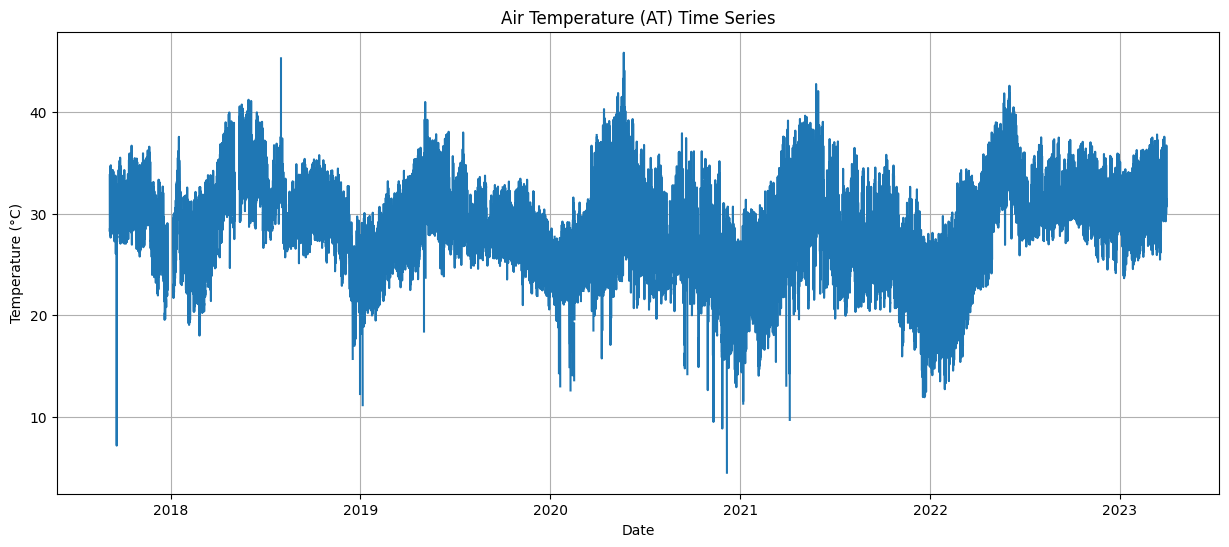

In [ ]:
# Time series plot untuk melihat pola/tren Air Temperature dari waktu ke waktu
plt.figure(figsize=(15,6))
plt.plot(df['From Date'], df['AT (degree C)'])
plt.title('Air Temperature (AT) Time Series')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid()
plt.show()

Time series menunjukkan pola **Cyclic**, di mana AT naik dan turun dengan periode yang tidak tetap. Fluktuasi terjadi tanpa pola musiman yang jelas, menunjukkan dinamika lingkungan (variables) yang lebih variatif.

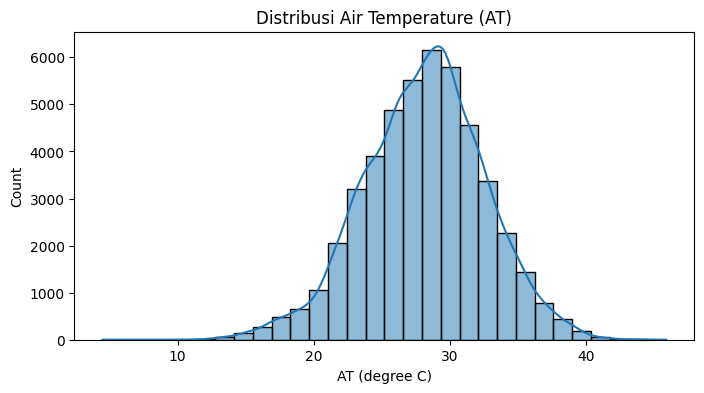

In [ ]:
# Distribusi Air Temperature (AT (degree C)) untuk melihat sebaran nilai AT dan memahami bentuk distribusi
plt.figure(figsize=(8,4))
sns.histplot(df['AT (degree C)'], kde=True, bins=30)
plt.title('Distribusi Air Temperature (AT)')
plt.show()

Kolom AT berdistribusi normal, artinya nilai-nilainya tersebar simetris di sekitar rata-rata dan sebagian besar data berada di tengah.

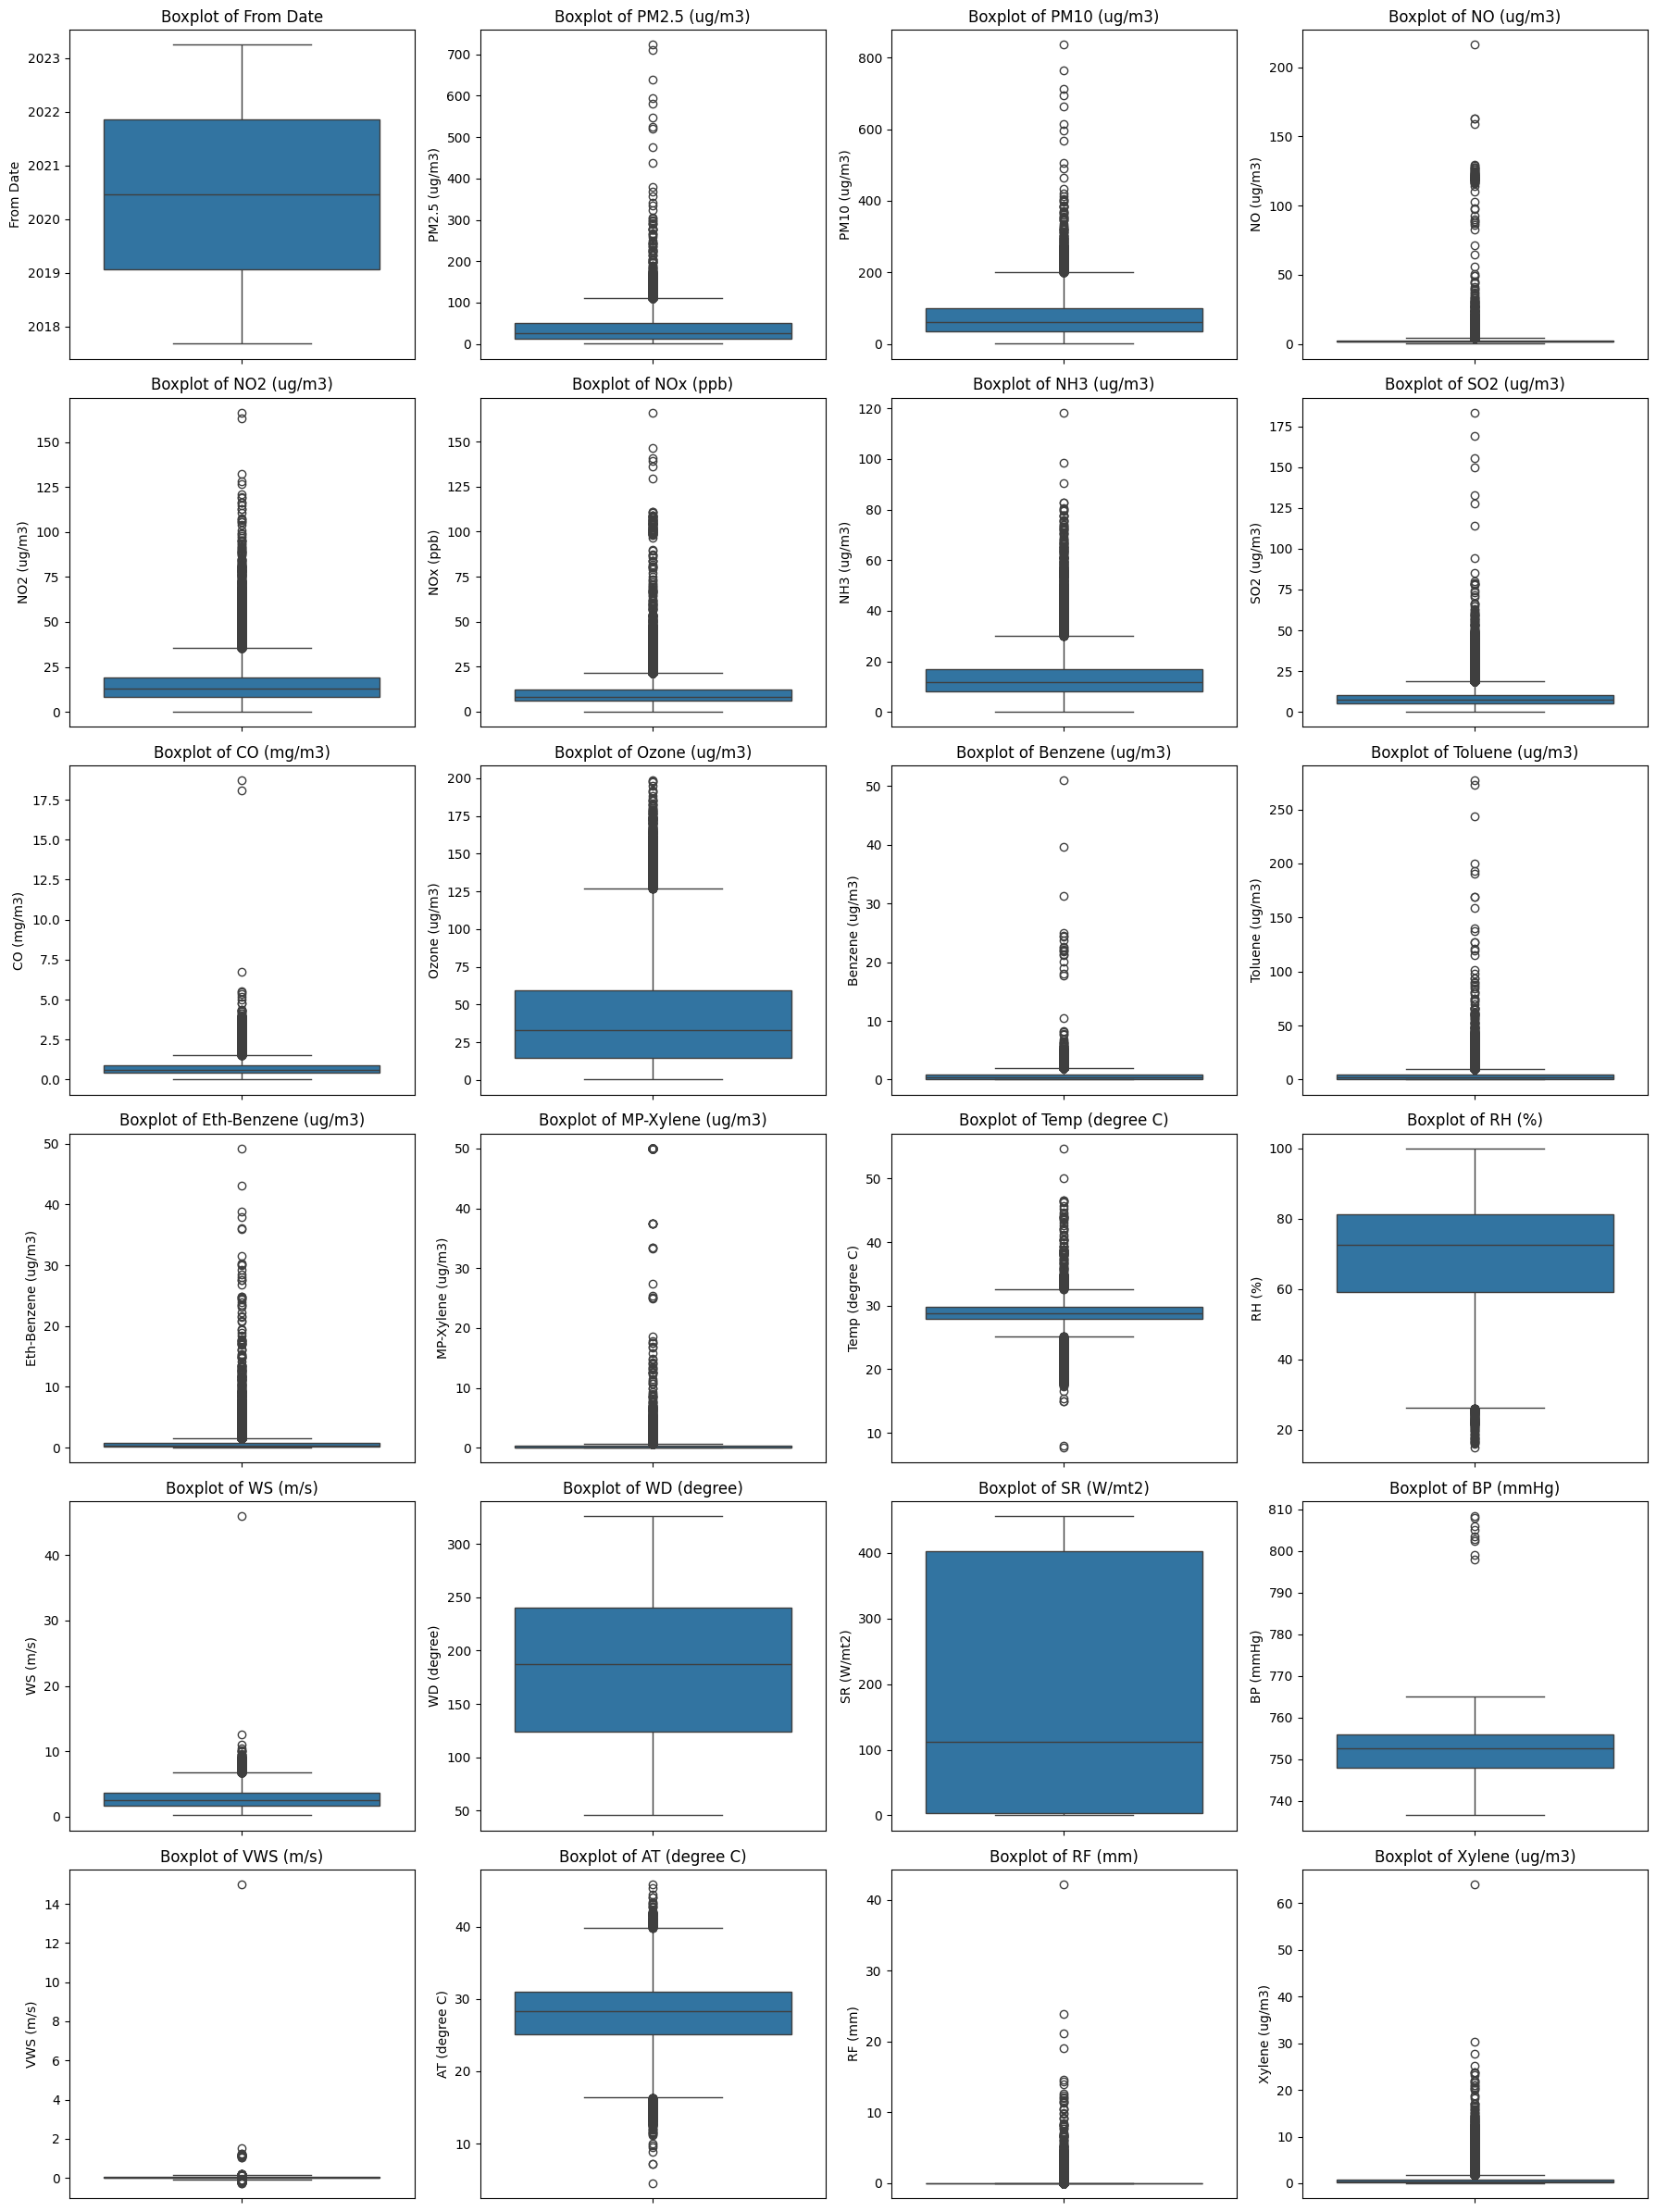

In [ ]:
# Boxplot untuk mendeteksi outlier
n_cols = 4
n_rows = int(np.ceil(len(df.columns) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

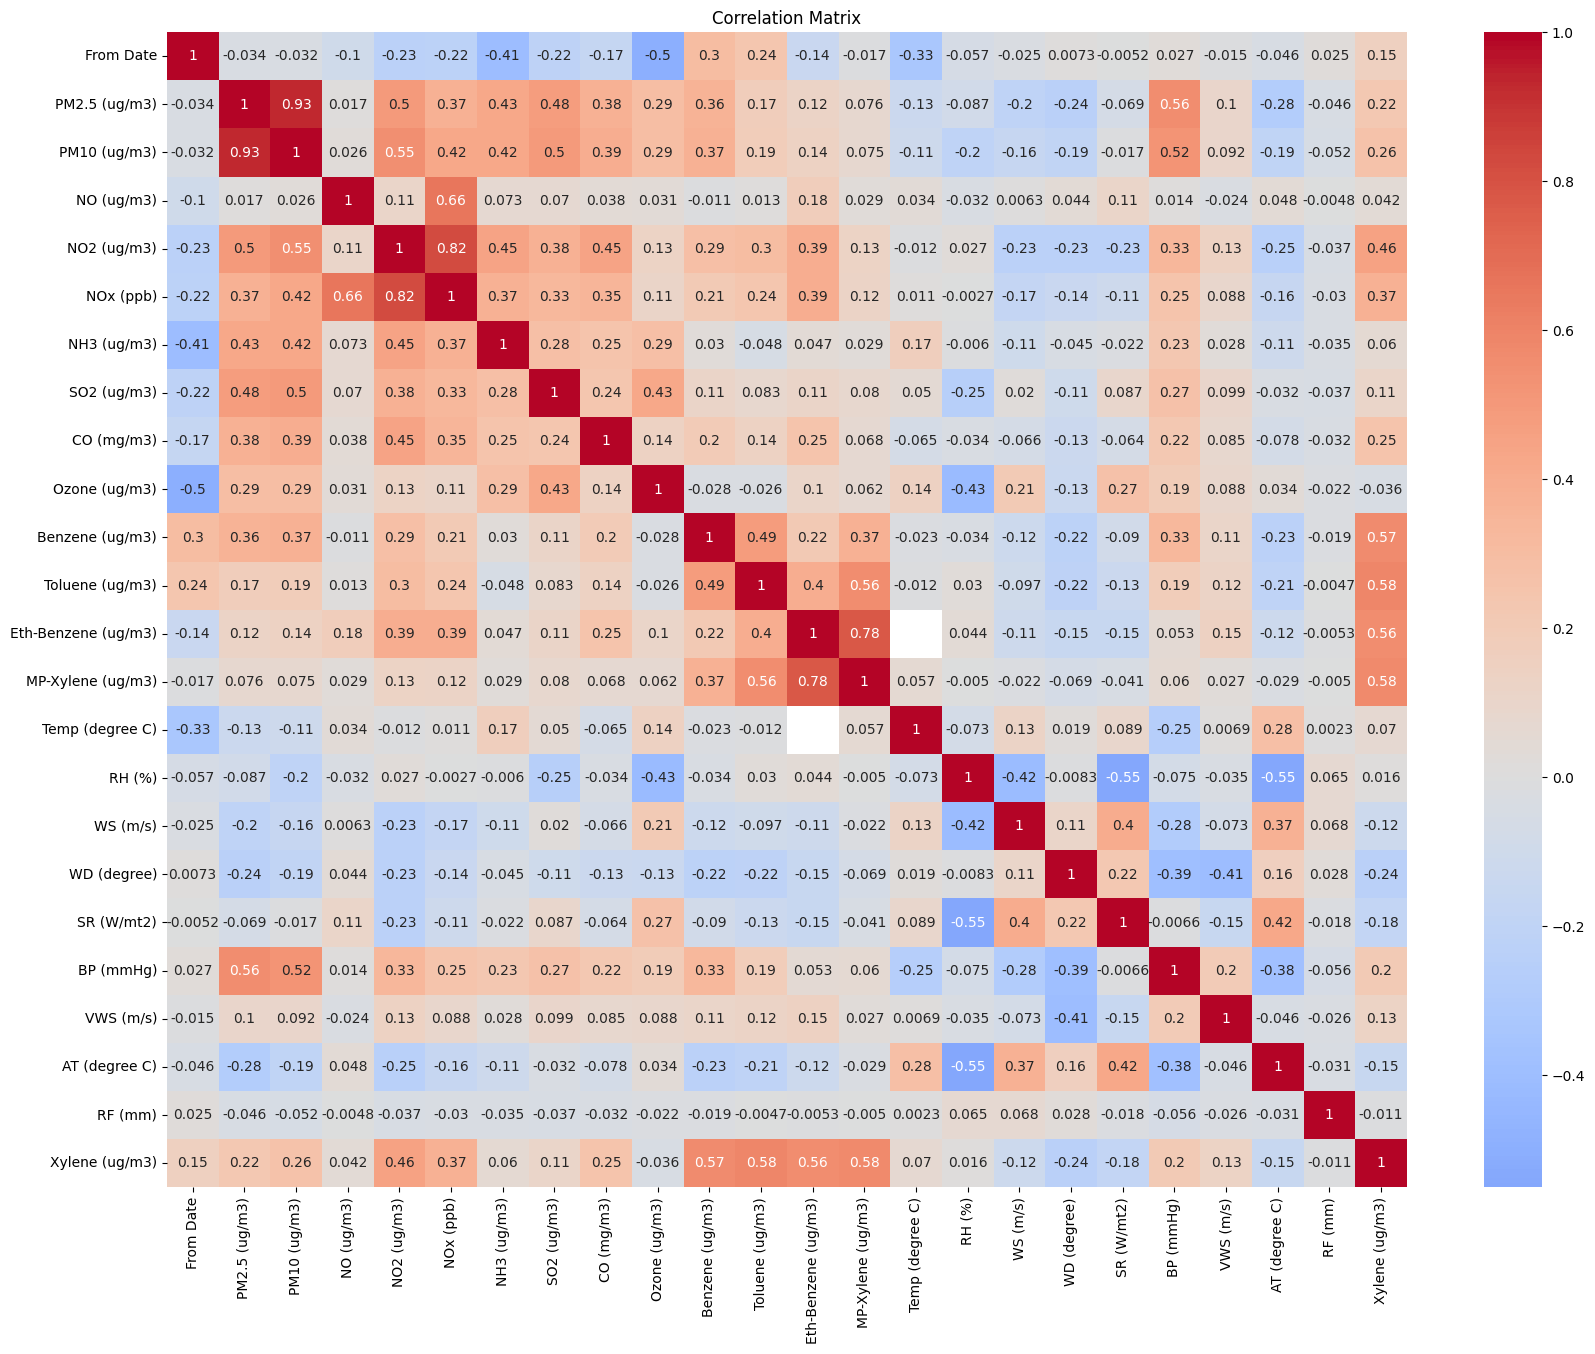


Korelasi terhadap AT:
AT (degree C)          1.000000
SR (W/mt2)             0.421172
WS (m/s)               0.369179
Temp (degree C)        0.283260
WD (degree)            0.159672
NO (ug/m3)             0.047684
Ozone (ug/m3)          0.034348
MP-Xylene (ug/m3)     -0.028933
RF (mm)               -0.031022
SO2 (ug/m3)           -0.031776
From Date             -0.046222
VWS (m/s)             -0.046270
CO (mg/m3)            -0.077925
NH3 (ug/m3)           -0.108925
Eth-Benzene (ug/m3)   -0.121125
Xylene (ug/m3)        -0.149529
NOx (ppb)             -0.161794
PM10 (ug/m3)          -0.193543
Toluene (ug/m3)       -0.208007
Benzene (ug/m3)       -0.231921
NO2 (ug/m3)           -0.245542
PM2.5 (ug/m3)         -0.276681
BP (mmHg)             -0.382988
RH (%)                -0.550333
Name: AT (degree C), dtype: float64


In [ ]:
# Heatmap korelasi untuk melihat hubungan antarfitur
corr_matrix = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Korelasi terhadap AT untuk mengidentifikasi fitur yang paling berpengaruh terhadap AT (positif ataupun negatif)
print("\nKorelasi terhadap AT:")
print(corr_matrix['AT (degree C)'].sort_values(ascending=False))

In [ ]:
df.duplicated().any() # untuk cek baris duplikat yang harus didrop

np.False_

---

# Data Splitting + Preprocessing

Sebelum data displit, ada 3 hal yang harus dihandle terlebih dahulu:



*   Set kolom From Date menjadi index
*   Drop baris yang value di target labelnya (AT) NaN
*   Drop kolom dengan missing value > 50%


In [ ]:
# Set kolom From Date menjadi index
df.set_index('From Date', inplace=True)

In [ ]:
# Drop baris yang value di target labelnya (AT) NaN
df.dropna(subset=['AT (degree C)'], inplace=True)
df['AT (degree C)'].isnull().any()

np.False_

**Drop kolom dengan missing value >50%**

In [ ]:
missing_percent

,0
From Date,0.000000
PM2.5 (ug/m3),5.036679
PM10 (ug/m3),3.862547
NO (ug/m3),3.192492
NO2 (ug/m3),3.233474
NOx (ppb),4.454735
NH3 (ug/m3),3.405598
SO2 (ug/m3),4.411704
CO (mg/m3),4.948568
Ozone (ug/m3),3.372813


Semua variabel selain data tanggal terdapat missing values.

Saya akan drop kolom yang terdapat missing value lebih dari 50% dari total record, karena dianggap tidak cukup informatif dan bisa mengganggu kualitas model.

In [ ]:
cols_to_drop = missing_percent[missing_percent > 50].index
df.drop(columns=cols_to_drop, inplace=True)

In [ ]:
df.info() # overview data sebelum displit

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47286 entries, 2017-09-05 14:00:00 to 2023-03-31 23:00:00
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PM2.5 (ug/m3)      46244 non-null  float64
 1   PM10 (ug/m3)       46816 non-null  float64
 2   NO (ug/m3)         47143 non-null  float64
 3   NO2 (ug/m3)        47122 non-null  float64
 4   NOx (ppb)          46526 non-null  float64
 5   NH3 (ug/m3)        47046 non-null  float64
 6   SO2 (ug/m3)        46546 non-null  float64
 7   CO (mg/m3)         46287 non-null  float64
 8   Ozone (ug/m3)      47054 non-null  float64
 9   Benzene (ug/m3)    46818 non-null  float64
 10  Toluene (ug/m3)    46813 non-null  float64
 11  MP-Xylene (ug/m3)  39047 non-null  float64
 12  RH (%)             47275 non-null  float64
 13  WS (m/s)           47285 non-null  float64
 14  WD (degree)        47283 non-null  float64
 15  SR (W/mt2)         47057 non-null  

In [ ]:
n = len(df)

train_end = int(n * 0.8) # batas akhir data train
val_end = int(n * 0.9) # batas akhir data validation

df_train = df.iloc[:train_end].copy()  # 80% pertama -> train
df_val = df.iloc[train_end:val_end].copy()  # 10% berikutnya -> validasi
df_test = df.iloc[val_end:].copy()  # 10% terakhir -> test

1. **Handle missing values dengan forward fill & backward fill**

In [ ]:
# Impute missing values per split
for df_split in [df_train, df_val, df_test]:
    df_split.ffill(inplace=True)
    df_split.bfill(inplace=True)

2. **Scaling**

Hasil boxplot dari kolom-kolom di df:

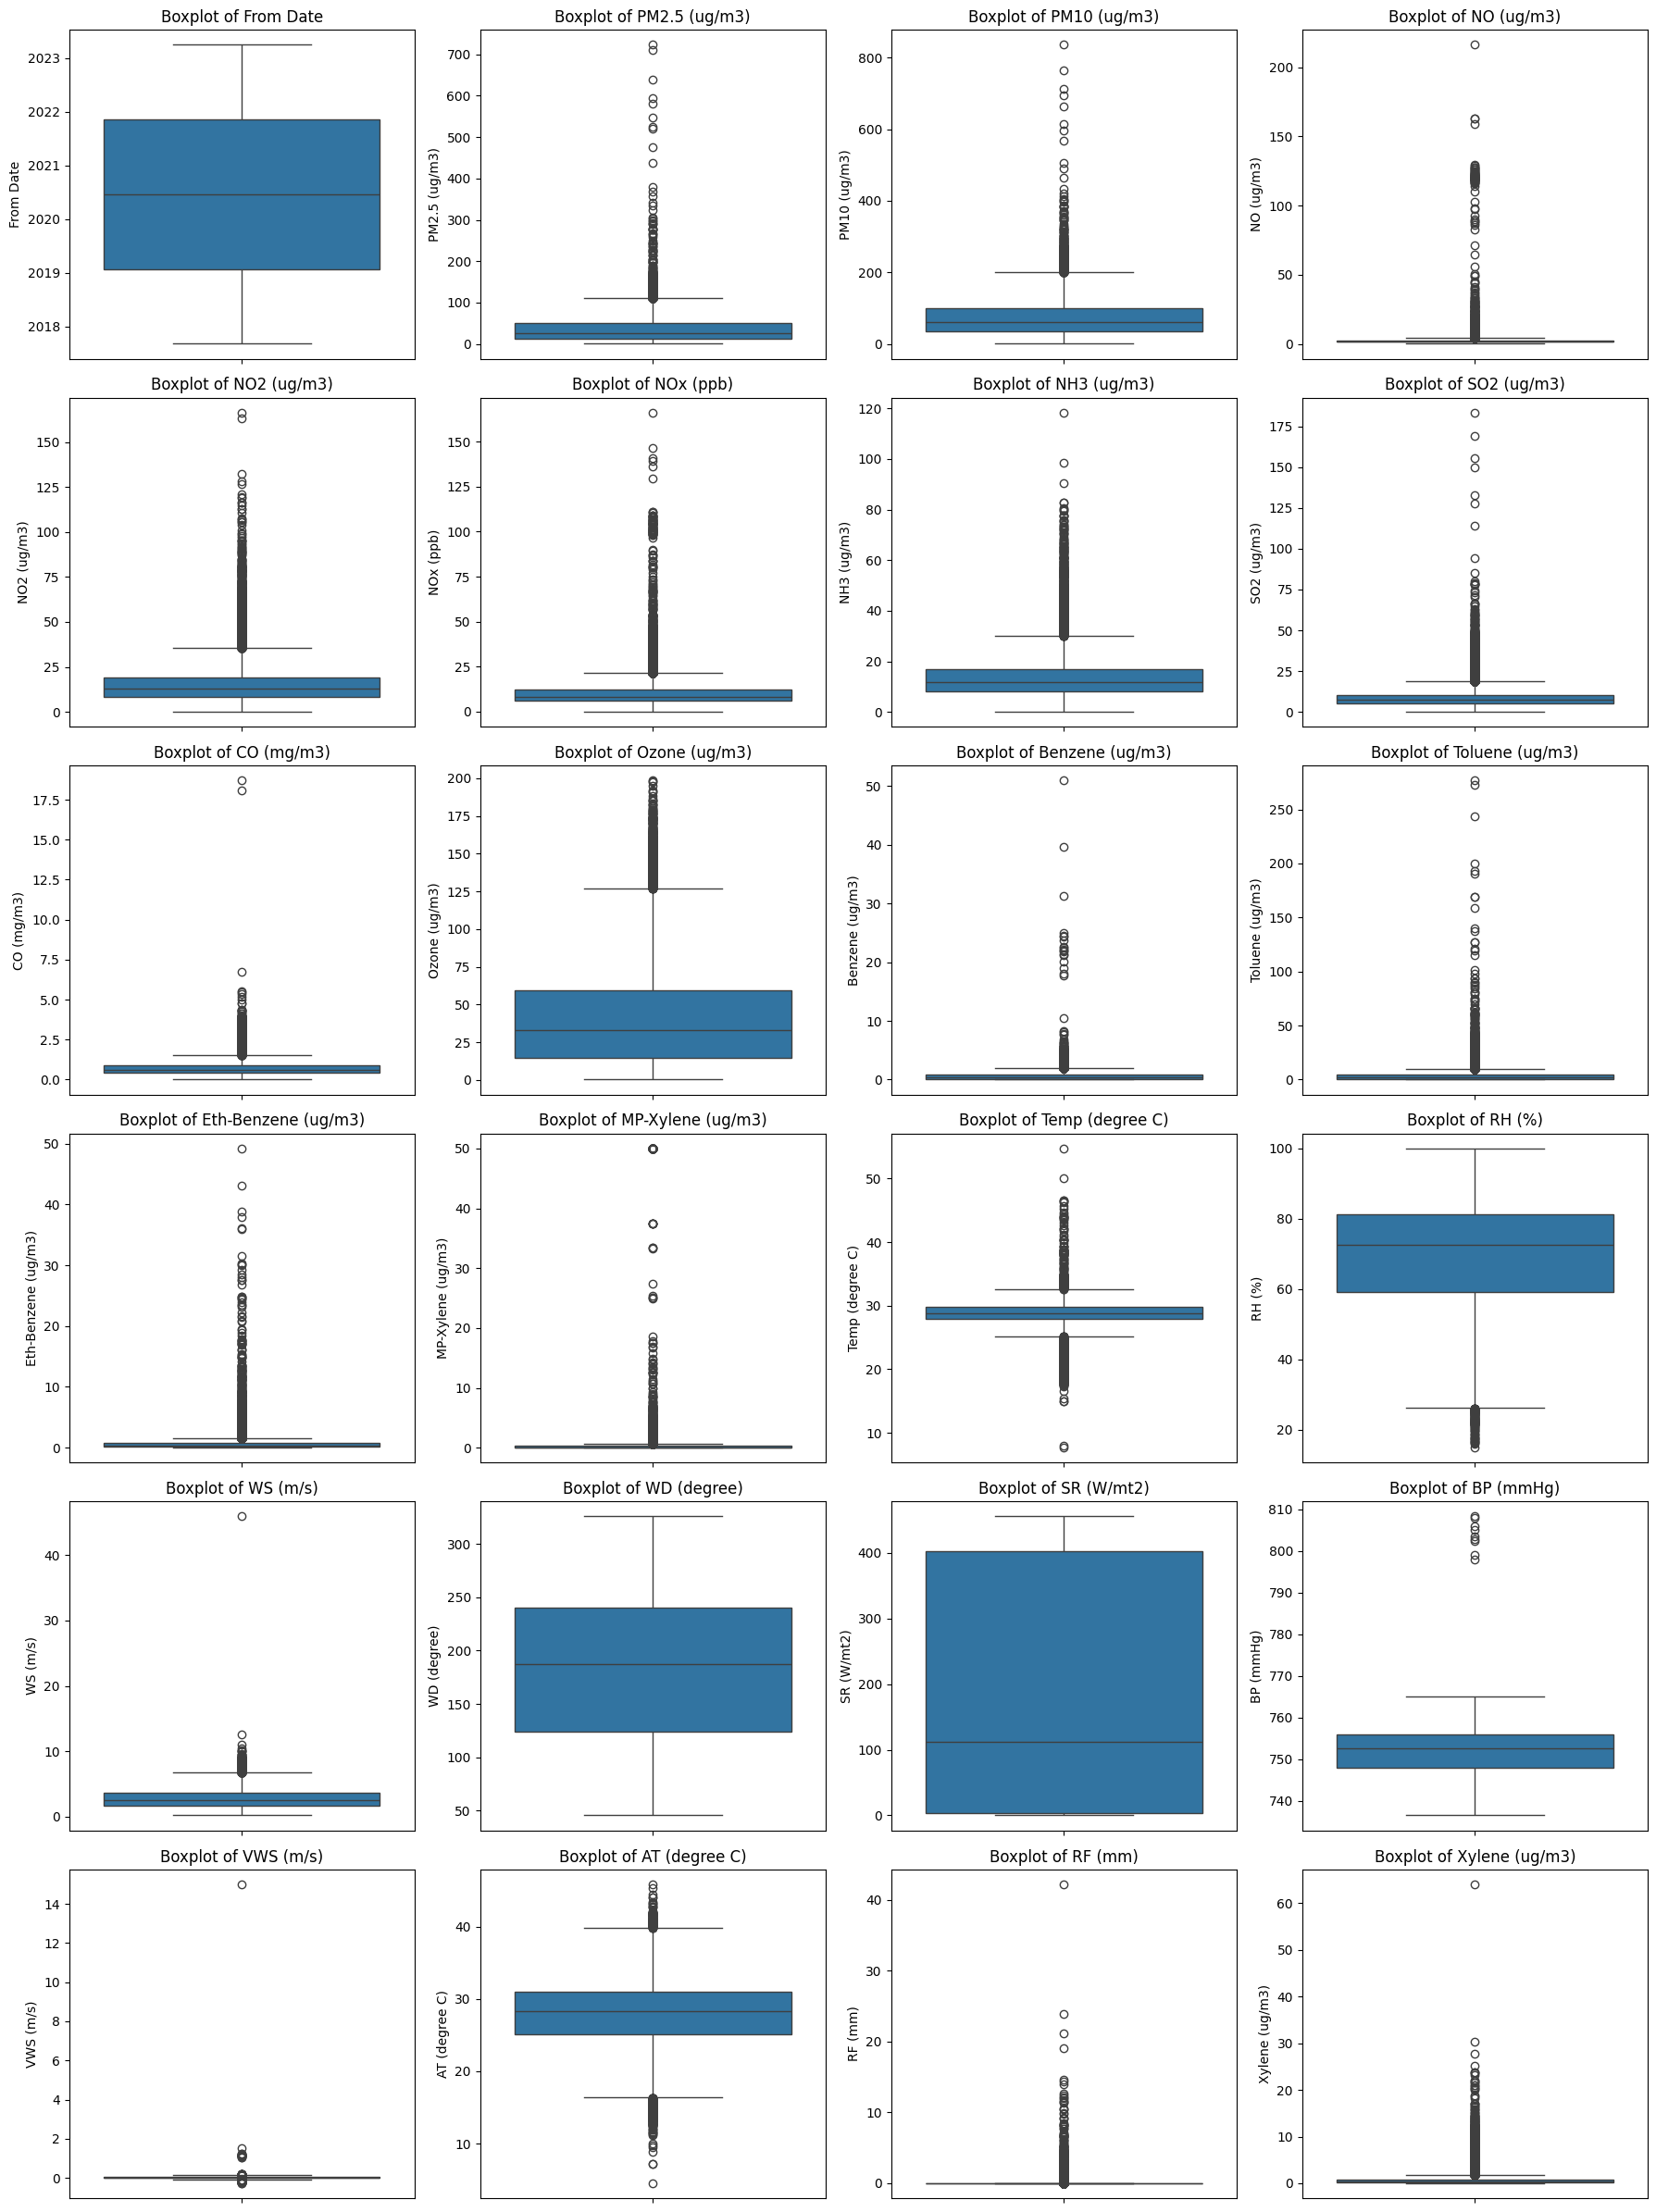

Karena mayoritas kolom featuresnya mempunyai outlier yang ekstrem, saya akan scale menggunakan RobustScaler.

In [ ]:
scaler = RobustScaler()

# Scale data train (fit dan transform)
df_train_scaled = pd.DataFrame(scaler.fit_transform(df_train), columns=df_train.columns,index=df_train.index)

# Scale data validasi (hanya transform)
df_val_scaled = pd.DataFrame(scaler.transform(df_val), columns=df_val.columns, index=df_val.index)

# Scale data test (hanya transform)
df_test_scaled = pd.DataFrame(scaler.transform(df_test), columns=df_test.columns, index=df_test.index)

2. **Windowing & split data**

In [ ]:
window_size = 5
def make_windows(df, window_size, target):

    x, y = [], []
    for i in range(len(df) - window_size):
        x.append(df.iloc[i:i+window_size].values)
        y.append(df.iloc[i+window_size, target])
    return np.array(x), np.array(y)

target = df_train_scaled.columns.get_loc('AT (degree C)')
x_train, y_train = make_windows(df_train_scaled, 5, target) # window size = 5, target = AT
x_val, y_val = make_windows(df_val_scaled, 5, target)
x_test, y_test = make_windows(df_test_scaled, 5, target)

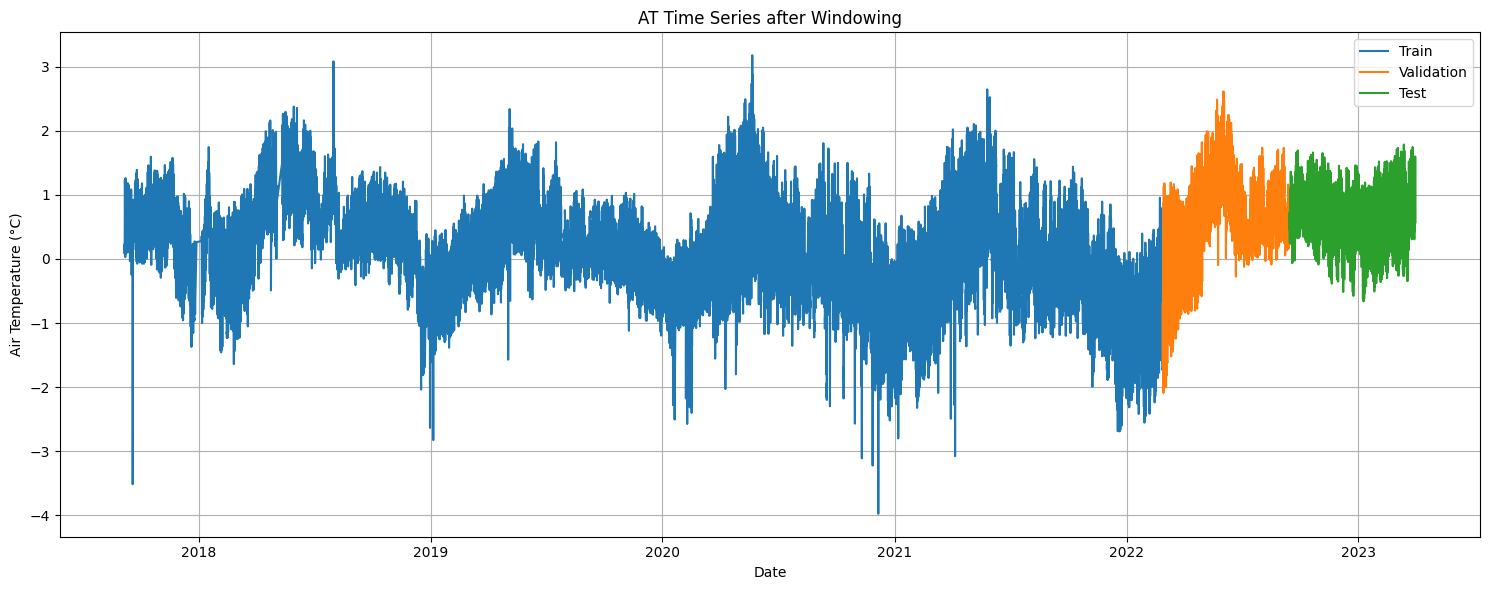

In [ ]:
# Plot distribusi splitting

# Ambil index untuk masing-masing subset
timesteps_train = df_train_scaled.index[window_size:]
timesteps_val = df_val_scaled.index[window_size:]
timesteps_test = df_test_scaled.index[window_size:]

plt.figure(figsize=(15, 6))
plt.plot(timesteps_train, y_train, label='Train')
plt.plot(timesteps_val, y_val, label='Validation')
plt.plot(timesteps_test, y_test, label='Test')
plt.xlabel('Date')
plt.ylabel('Air Temperature (°C)')
plt.title('AT Time Series after Windowing')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


*   Data train -> biru, 2017–2022
*   Data validation -> orange, pertengahan 2022
*   Data test -> hijau, 2022-2023

---

# Baseline LSTM Model

In [ ]:
input_shape = x_train.shape[1:]

baseline_model = Sequential([
    LSTM(10, input_shape=input_shape), # 10 hidden size
    Dense(1, activation='linear')  # single regressor
])

baseline_model.compile(
    loss='mse',
    optimizer='adam',
    metrics=['mae']
)

baseline_model.summary()

history = baseline_model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=25,
    batch_size=32,
    verbose=1
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10)             │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,291 (5.04 KB)

 Trainable params: 1,291 (5.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.2460 - mae: 0.3502 - val_loss: 0.0454 - val_mae: 0.1635
Epoch 2/25
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0355 - mae: 0.1259 - val_loss: 0.0260 - val_mae: 0.1181
Epoch 3/25
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0275 - mae: 0.1070 - val_loss: 0.0258 - val_mae: 0.1183
Epoch 4/25
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.0251 - mae: 0.1005 - val_loss: 0.0248 - val_mae: 0.1173
Epoch 5/25
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0249 - mae: 0.0982 - val_loss: 0.0252 - val_mae: 0.1188
Epoch 6/25
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0239 - mae: 0.0961 - val_loss: 0.0205 - val_mae: 0.1001
Epoch 7/25
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0231 - mae: 0.0953 - val_loss: 0.0207 - val_mae: 0.1030
Epoch 8/25
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0230 - mae: 0.0939 - val_loss: 0.0198 - val_mae: 0.1008
Epoch 9/25
1182/1182 ━━━━━━━━━━━━━━━━━

---

# Modified LSTM Model

* Tambah **Dropout**(0.1)
: Untuk mengurangi overfitting ringan dan meningkatkan generalisasi model

* Tambah **EarlyStopping** dengan restore_best_weights
: Untuk menghentikan training saat val_loss tidak membaik dan memastikan model menggunakan bobot terbaik

* Tambah **epochs** dari 25 ke 50
: Memberi model lebih banyak waktu belajar, dikontrol oleh early stopping agar tidak overfitting

In [ ]:
input_shape = x_train.shape[1:]

modified_model = Sequential([
    LSTM(10, return_sequences=False, input_shape=input_shape),
    Dropout(0.1),  # dropout ringan
    Dense(1, activation='linear')
])

modified_model.compile(
    loss='mse',
    optimizer='adam',
    metrics=['mae']
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True  # kembali ke bobot terbaik
)

modified_model.summary()

history = modified_model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=50,  # menambah jumlah epoch
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 10)             │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,291 (5.04 KB)

 Trainable params: 1,291 (5.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.2003 - mae: 0.3223 - val_loss: 0.0477 - val_mae: 0.1677
Epoch 2/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0491 - mae: 0.1547 - val_loss: 0.0298 - val_mae: 0.1287
Epoch 3/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0396 - mae: 0.1361 - val_loss: 0.0260 - val_mae: 0.1188
Epoch 4/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0363 - mae: 0.1283 - val_loss: 0.0268 - val_mae: 0.1240
Epoch 5/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0348 - mae: 0.1244 - val_loss: 0.0210 - val_mae: 0.1081
Epoch 6/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0361 - mae: 0.1228 - val_loss: 0.0228 - val_mae: 0.1138
Epoch 7/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0330 - mae: 0.1198 - val_loss: 0.0226 - val_mae: 0.1117
Epoch 8/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0321 - mae: 0.1189 - val_loss: 0.0231 - val_mae: 0.1125
Epoch 9/50
1182/1182 ━━━━━━━━━━━━━━━━━

# Model Evaluation

In [ ]:
# Prediksi baseline
y_pred_baseline = baseline_model.predict(x_test).flatten()

# Evaluasi
print("=== Baseline LSTM ===")
print("MAE:", mean_absolute_error(y_test, y_pred_baseline))
print("MSE:", mean_squared_error(y_test, y_pred_baseline))
print("R2:", r2_score(y_test, y_pred_baseline))

148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
=== Baseline LSTM ===
MAE: 0.09612511951874186
MSE: 0.017598015262775154
R2: 0.9184228479443186


Hasil evaluasi menunjukkan performa model yang baik untuk tugas prediksi/regresi:

**MAE 0.096** : Rata-rata selisih prediksi dengan nilai aktual hanya 0.096 unit


**MSE 0.0176** : Error kuadrat rendah -> tidak ada outlier besar yang merusak prediksi

**R² 0.918** : Model menjelaskan 91.8% variansi data, 8.2% error yang tidak terprediksi

In [ ]:
# Prediksi modified
y_pred_modif = modified_model.predict(x_test).flatten()

# Evaluasi
print("\n=== Modified LSTM ===")
print("MAE:", mean_absolute_error(y_test, y_pred_modif))
print("MSE:", mean_squared_error(y_test, y_pred_modif))
print("R2:", r2_score(y_test, y_pred_modif))

148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

=== Modified LSTM ===
MAE: 0.0872970678908695
MSE: 0.014710415024680094
R2: 0.9318085735606263


Hasil evaluasi menunjukkan performa model yang sangat baik untuk tugas prediksi/regresi:

* **MAE: 0.0873**  
  Rata-rata selisih antara hasil prediksi dan nilai aktual hanya sekitar 0.0873 unit → menunjukkan presisi tinggi.  

* **MSE: 0.0147**  
  Error kuadrat sangat rendah → tidak terdapat outlier besar yang merusak prediksi.  

* **R²: 0.9318**  
  Model mampu menjelaskan 93.18% variansi dalam data → hanya sekitar 6.82% variasi yang tidak berhasil dijelaskan.

### Perbandingan terhadap Baseline Model:
MAE **menurun** dari 0.0961 → 0.0873, menunjukkan peningkatan akurasi prediksi.

MSE **turun** dari 0.0176 → 0.0147, menandakan error makin kecil dan prediksi lebih konsisten.

R² **meningkat** dari 0.9184 → 0.9318, artinya model menjadi lebih andal dalam menjelaskan pola data.

148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


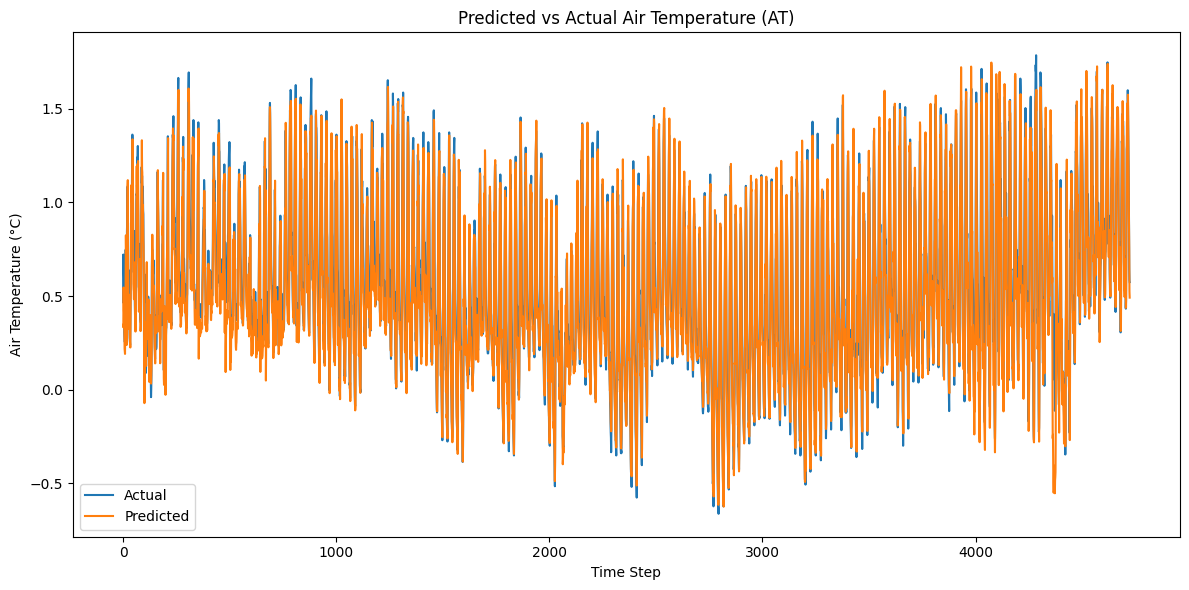

In [ ]:
# Prediksi (dari model modifikasi)
y_pred_mod = modified_model.predict(x_test)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_mod, label='Predicted')
plt.title('Predicted vs Actual Air Temperature (AT)')
plt.xlabel('Time Step')
plt.ylabel('Air Temperature (°C)')
plt.legend()
plt.tight_layout()
plt.show()

Problem ini secara langsung merupakan kasus time series multivariate regression, karena:

1. Input terdiri dari banyak fitur (sensor + waktu) yang bervariasi terhadap waktu

2. Target (AT) juga time-dependent (AT berubah tiap jam)

3. Data diubah menjadi bentuk window sequential (5 jam) -> model belajar pola antar fitur dan waktu

4. Model yang digunakan (LSTM) memang untuk multivariate sequence modeling

# Presentation Video
Link video: https://drive.google.com/drive/folders/1MyWSBI5JUqLo_HTm5Bil-h7u5RLIHnJt?usp=sharing